In [2]:
import pickle
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dat_test = pd.read_csv('./data/maxheight-1_test_data.csv')

In [24]:
print(dat_test.columns)

Index(['per_0', 'per_1', 'per_2', 'per_3', 'per_4', 'per_5', 'per_6', 'per_7',
       'per_8', 'per_9', 'per_10', 'per_11', 'per_12', 'per_13', 'per_14',
       'per_15', 'per_16', 'per_17', 'per_18', 'per_19', 'per_20', 'per_21',
       'per_22', 'per_23', 'per_24', 'per_25', 'per_26', 'per_27', 'per_28',
       'per_29', 'per_30', 'per_31', 'per_32', 'per_33', 'per_34', 'per_35',
       'sig_0', 'sig_1', 'sig_2', 'sig_3', 'sig_4', 'sig_5', 'sig_6', 'sig_7',
       'sig_8', 'sig_9', 'sig_10', 'sig_11', 'sig_12', 'sig_13', 'sig_14',
       'sig_15', 'sig_16', 'sig_17', 'sig_18', 'sig_19', 'sig_20', 'sig_21',
       'sig_22', 'sig_23', 'sig_24', 'sig_25', 'sig_26', 'sig_27', 'sig_28',
       'sig_29', 'sig_30', 'sig_31', 'sig_32', 'sig_33', 'sig_34', 'sig_35',
       'GFS_wind_dir_norm', 'GFS_wind_speed', 'GFS_onshore_comp',
       'human_report_surf_max'],
      dtype='object')


In [25]:
dtrain = xgb.DMatrix('./data/maxheight-1_train_data.csv?format=csv&label_column=75')
dtest = xgb.DMatrix('./data/maxheight-1_test_data.csv?format=csv&label_column=75')

[00:32:55] 96448x75 matrix with 7233600 entries loaded from ./data/maxheight-1_train_data.csv?format=csv&label_column=75
[00:32:55] 10718x75 matrix with 803850 entries loaded from ./data/maxheight-1_test_data.csv?format=csv&label_column=75


In [44]:
param = {'max_depth': 15, 
         'eta': 0.03816566691915779, 
         'objective': 'reg:linear',
         'alpha': 0.0036124167200432735,
         'colsample_bytree': 0.43972748968011105,
         'gamma': 0.007556628335331578,
         'lambda': 0.0019288791315820125,
         'min_child_weight': 0.021999131943895422,
         'subsample': 0.9985121524316329}

In [45]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [46]:
num_round = 200
bst = xgb.train(param, dtrain, num_round, evallist)

[16:09:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	eval-rmse:0.882376	train-rmse:0.870986
[1]	eval-rmse:0.86597	train-rmse:0.854041
[2]	eval-rmse:0.852187	train-rmse:0.839819
[3]	eval-rmse:0.833101	train-rmse:0.820793
[4]	eval-rmse:0.817774	train-rmse:0.805182
[5]	eval-rmse:0.80146	train-rmse:0.788591
[6]	eval-rmse:0.78268	train-rmse:0.769257
[7]	eval-rmse:0.767271	train-rmse:0.75366
[8]	eval-rmse:0.75262	train-rmse:0.738377
[9]	eval-rmse:0.73885	train-rmse:0.72429
[10]	eval-rmse:0.722238	train-rmse:0.707414
[11]	eval-rmse:0.709706	train-rmse:0.69395
[12]	eval-rmse:0.70062	train-rmse:0.684451
[13]	eval-rmse:0.69085	train-rmse:0.674597
[14]	eval-rmse:0.680313	train-rmse:0.663913
[15]	eval-rmse:0.670767	train-rmse:0.653463
[16]	eval-rmse:0.656049	train-rmse:0.638535
[17]	eval-rmse:0.646815	train-rmse:0.628857
[18]	eval-rmse:0.637863	train-rmse:0.61946

[182]	eval-rmse:0.316234	train-rmse:0.235151
[183]	eval-rmse:0.315964	train-rmse:0.234687
[184]	eval-rmse:0.315691	train-rmse:0.234058
[185]	eval-rmse:0.315392	train-rmse:0.233507
[186]	eval-rmse:0.315024	train-rmse:0.23278
[187]	eval-rmse:0.314754	train-rmse:0.232263
[188]	eval-rmse:0.314504	train-rmse:0.231682
[189]	eval-rmse:0.314213	train-rmse:0.230984
[190]	eval-rmse:0.313919	train-rmse:0.230271
[191]	eval-rmse:0.313478	train-rmse:0.229381
[192]	eval-rmse:0.31315	train-rmse:0.228514
[193]	eval-rmse:0.312768	train-rmse:0.22758
[194]	eval-rmse:0.312329	train-rmse:0.22682
[195]	eval-rmse:0.312037	train-rmse:0.226156
[196]	eval-rmse:0.311812	train-rmse:0.225711
[197]	eval-rmse:0.311492	train-rmse:0.224971
[198]	eval-rmse:0.311206	train-rmse:0.224304
[199]	eval-rmse:0.311006	train-rmse:0.223947


In [43]:
ypred = bst.predict(dtest)[1:]


In [30]:
ytrue = dat_test['human_report_surf_max'].values

In [31]:
error_ft = np.abs(ytrue * 3.28 - ypred * 3.28)

In [32]:
np.sqrt(np.mean(np.power(error_ft, 2)))

0.9985051157342638

In [33]:
np.mean(error_ft)

0.6132149863149944

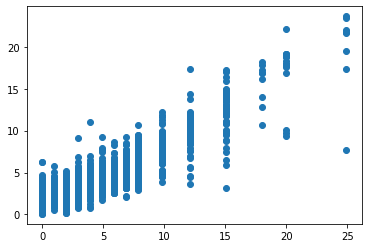

In [34]:
plt.scatter(ytrue * 3.28, ypred * 3.28)

(array([2.207e+03, 1.785e+03, 1.406e+03, 9.370e+02, 7.970e+02, 6.420e+02,
        4.940e+02, 4.340e+02, 3.120e+02, 2.460e+02, 2.110e+02, 1.720e+02,
        1.410e+02, 1.080e+02, 1.060e+02, 9.000e+01, 7.400e+01, 6.800e+01,
        6.800e+01, 5.200e+01, 4.000e+01, 3.900e+01, 3.200e+01, 3.900e+01,
        3.100e+01, 2.400e+01, 1.400e+01, 2.400e+01, 1.400e+01, 9.000e+00,
        1.100e+01, 1.000e+01, 6.000e+00, 4.000e+00, 5.000e+00, 4.000e+00,
        4.000e+00, 3.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 2.000e+00,
        6.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.  , 0.12, 0.24, 0.36, 0.48, 0.6 , 0.72, 0.84, 0.96, 1.08, 1.2 ,
        1.32, 1.44, 1.56, 1.68, 1.8 , 1.92, 2.04, 2.16, 2.28, 2.4 , 2.52,
        2.64, 2.76, 2.88, 3.  , 3.12, 3.24, 3.36, 3.48, 3.6 , 3.72, 3.84,
        3.96, 4.08, 4.2 , 4.32, 4.44, 4.56, 4.68, 4.8 , 4.92, 5.04, 5.16,
        5.28, 5.4 , 5.52, 5.64, 5.76, 5.88, 6.  ]),
 <a list of 50 Patch objects

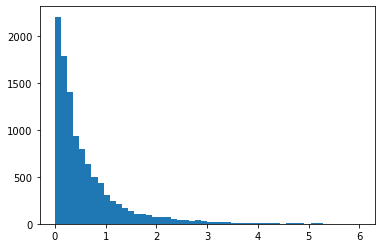

In [35]:
plt.hist(np.abs(ytrue * 3.28 - ypred * 3.28), bins=50, range=[0, 6])

In [47]:
pickle.dump(bst, open('./data/experiment-maxheight-1-1.pkl', 'wb'))